# Box-Plot

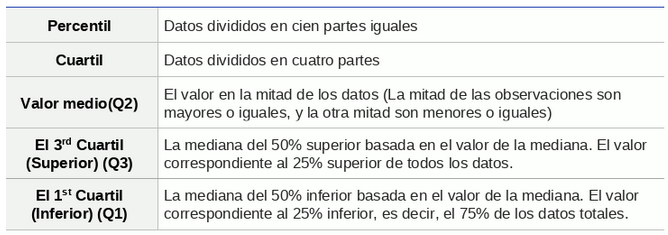

In [5]:
import pandas as pd

s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,1200])
print(len(s))

print(s.quantile([.25, .5, .75]))
s.mean(), s.median()

12
0.25    3.75
0.50    6.50
0.75    9.25
dtype: float64


(105.5, 6.5)

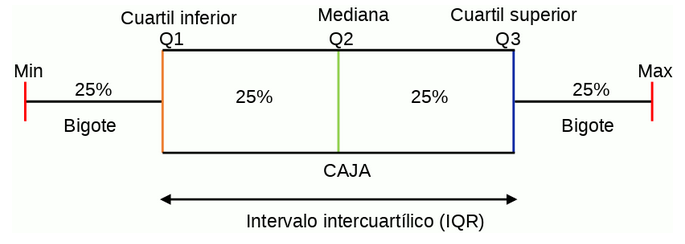

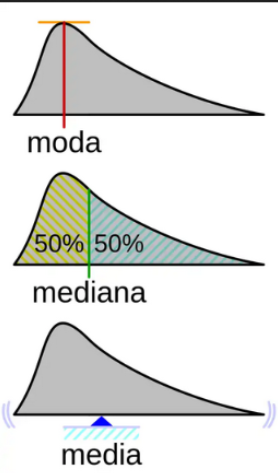

In [12]:
# s[11] = s.mean()
s[11] = (s.iloc[:11]).max()
s

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    11.0
dtype: float64

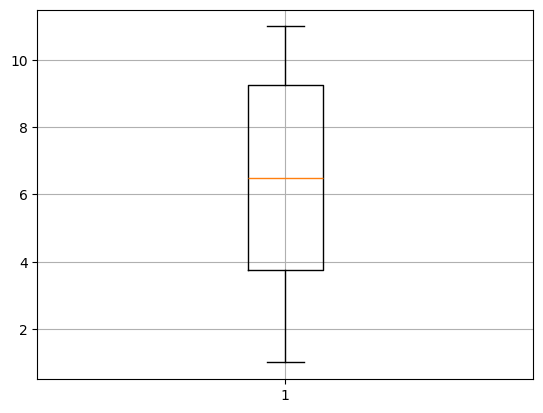

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(s)
plt.grid()

# Correlación

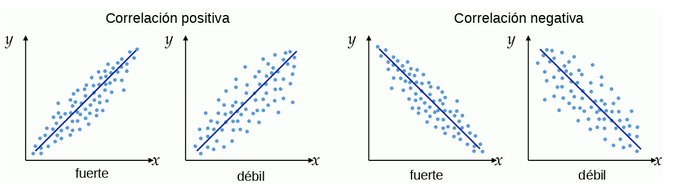

# Pivot

In [81]:
df = pd.DataFrame({
    'a':['John', 'Maria', 'Boby'],
    'b':['Maestria', 'Pregrado', 'Pregrado'],
    'c':[31, 23, 22]
}
)
df

,a,b,c
0,John,Maestria,31
1,Maria,Pregrado,23
2,Boby,Pregrado,22


In [82]:
df.pivot(index='a', columns='b', values='c')

b,Maestria,Pregrado
a,,
Boby,NaN,22.0
John,31.0,NaN
Maria,NaN,23.0


#
___
#
# Unit 39: Mini Proyecto de Análisis de Datos Financieros

* SPY: Índice S&P 500
* IYW: Índice de capitalización bursátil de las BigTechs estadounidenses
* VT: Inversión en empresas de todo el mundo
* DBA: Inversión en productos agrícolas y sus precios
* TLT: Índice de los bonos estadounidenses
* PDBC: Sigue la oferta y la demanda de otras materias primas y los precios
* IAU: Oro

In [17]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

# Fuente: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# opc1 de busqueda de datos financieros
# data = pdr.DataReader('GE', data_source='stooq', start=date(2020,1,1), end=date.today())

# opc2 de busqueda de datos financieros
# data = pdr.get_data_stooq('GE', date(2020,1,1), date.today()) # -> GE/General Electric

def get_stock(ticker, start, end):
    data = pdr.get_data_stooq(ticker, start, end)
    data.insert(0, "Ticker", ticker)
    return data

In [18]:
ini = date(2020,1,1)
fin = date.today()

SPY = get_stock("SPY", ini, fin)
IYW = get_stock("IYW", ini, fin)
VT  = get_stock("VT",  ini, fin)
DBA = get_stock("DBA", ini, fin)
TLT = get_stock("TLT", ini, fin)
PDBC= get_stock("PDBC",ini, fin)
IAU = get_stock("IAU", ini, fin)

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1224 entries, 2024-11-11 to 2020-01-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1224 non-null   object 
 1   Open    1224 non-null   float64
 2   High    1224 non-null   float64
 3   Low     1224 non-null   float64
 4   Close   1224 non-null   float64
 5   Volume  1224 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.9+ KB


In [19]:
SPY.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-11,SPY,599.81,600.17,597.0000,598.72,37455241.0
2024-11-08,SPY,596.17,599.64,596.1650,598.19,46444893.0
2024-11-07,SPY,593.08,596.65,592.9999,595.61,47233212.0
2024-11-06,SPY,589.20,591.93,585.3900,591.04,68181968.0
2024-11-05,SPY,570.74,576.74,570.5200,576.70,39478322.0


In [20]:
SPY.pivot(columns='Ticker', values='Close').head()

Ticker,SPY
Date,
2020-01-02,311.097
2020-01-03,308.737
2020-01-06,309.907
2020-01-07,309.044
2020-01-08,310.681


In [23]:
SPY['year'] = SPY.index.year
SPY.head()

,Ticker,Open,High,Low,Close,Volume,year
Date,,,,,,,
2024-11-11,SPY,599.81,600.17,597.0000,598.72,37455241.0,2024
2024-11-08,SPY,596.17,599.64,596.1650,598.19,46444893.0,2024
2024-11-07,SPY,593.08,596.65,592.9999,595.61,47233212.0,2024
2024-11-06,SPY,589.20,591.93,585.3900,591.04,68181968.0,2024
2024-11-05,SPY,570.74,576.74,570.5200,576.70,39478322.0,2024


In [24]:
SPY['year'].unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int32)

In [25]:
SPY = SPY.pivot(columns="Ticker", values='Close')
IYW = IYW.pivot(columns="Ticker", values="Close")
VT  =  VT.pivot(columns="Ticker", values="Close")
DBA = DBA.pivot(columns="Ticker", values="Close")
TLT = TLT.pivot(columns="Ticker", values="Close")
PDBC=PDBC.pivot(columns="Ticker", values="Close")
IAU = IAU.pivot(columns="Ticker", values="Close")

In [27]:
SPY.head()

Ticker,SPY
Date,
2020-01-02,311.097
2020-01-03,308.737
2020-01-06,309.907
2020-01-07,309.044
2020-01-08,310.681


In [28]:
# Genera un nuevo DataFrame a partir de la agrupación de otros dataFrames
# join outer -> Teoria de conjuntos
stock = pd.concat([SPY, IYW, VT, DBA, TLT,PDBC, IAU], axis=1, join='outer')

stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


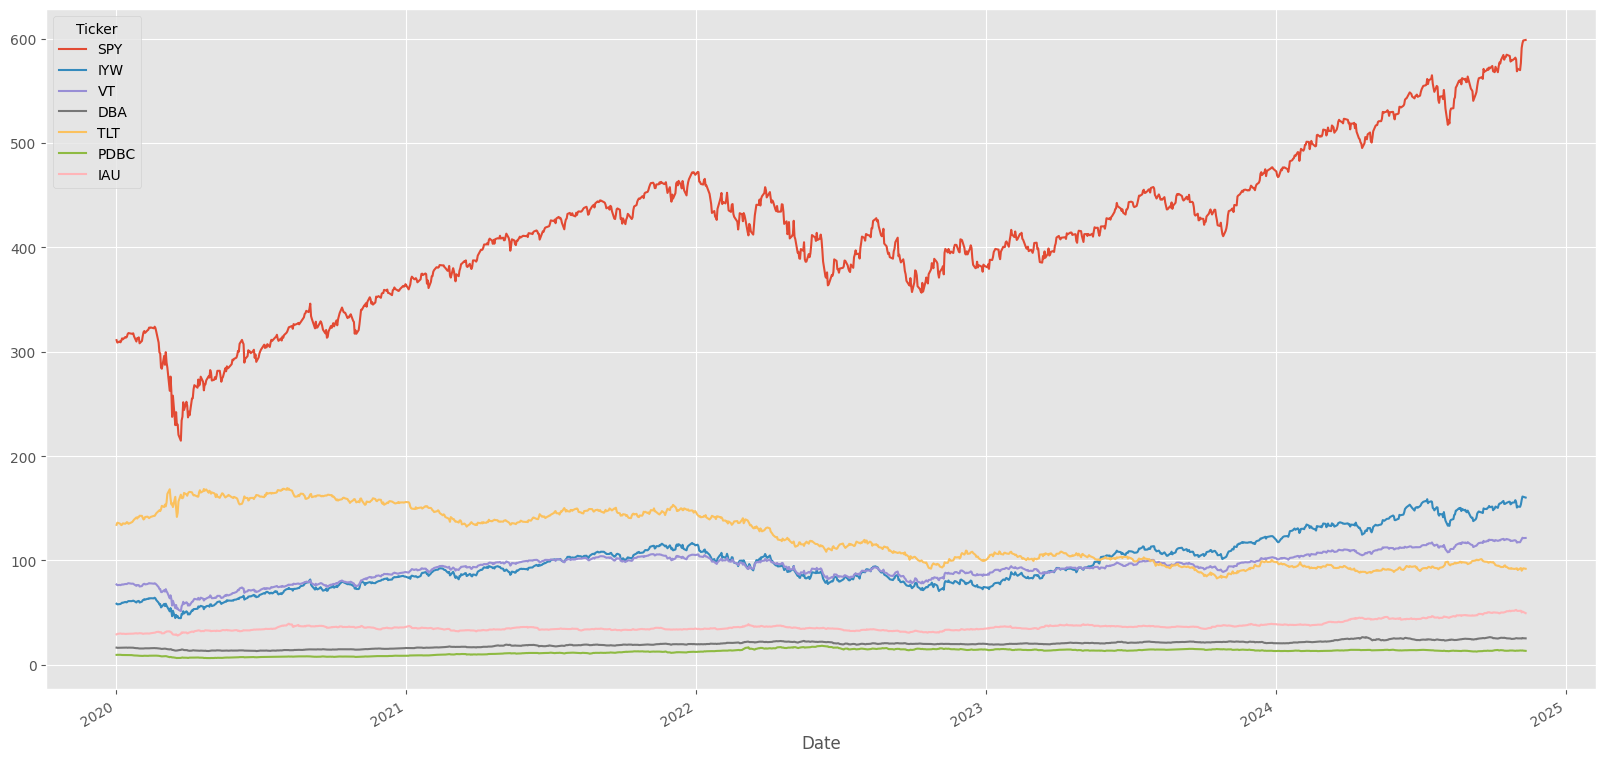

In [29]:
# Buscar plt.style.use en documentación
plt.style.use('ggplot')
stock.plot(figsize = (20,10))
plt.show()

In [35]:
#covid = stock.loc["2020-01-02":'2021-01-02']
covid = stock["2020-01-02":'2021-01-02']

In [36]:
covid.tail()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-12-24,359.964,84.6402,87.9381,15.83,155.552,8.68035,35.84
2020-12-28,363.047,85.2876,88.3423,15.77,155.621,8.63539,35.74
2020-12-29,362.363,84.7898,88.5129,15.82,155.422,8.66977,35.82
2020-12-30,362.869,84.5304,88.8209,15.98,155.760,8.70944,36.10
2020-12-31,364.713,84.5404,88.8886,16.14,155.989,8.74382,36.26


In [49]:
x = covid.index.values
print(x)
s_y = covid[['SPY']].values
i_y = covid[['IAU']].values
d_y = covid[['DBA']].values
t_y = covid[['TLT']].values
s_y

['2020-01-02T00:00:00.000000000' '2020-01-03T00:00:00.000000000'
 '2020-01-06T00:00:00.000000000' '2020-01-07T00:00:00.000000000'
 '2020-01-08T00:00:00.000000000' '2020-01-09T00:00:00.000000000'
 '2020-01-10T00:00:00.000000000' '2020-01-13T00:00:00.000000000'
 '2020-01-14T00:00:00.000000000' '2020-01-15T00:00:00.000000000'
 '2020-01-16T00:00:00.000000000' '2020-01-17T00:00:00.000000000'
 '2020-01-21T00:00:00.000000000' '2020-01-22T00:00:00.000000000'
 '2020-01-23T00:00:00.000000000' '2020-01-24T00:00:00.000000000'
 '2020-01-27T00:00:00.000000000' '2020-01-28T00:00:00.000000000'
 '2020-01-29T00:00:00.000000000' '2020-01-30T00:00:00.000000000'
 '2020-01-31T00:00:00.000000000' '2020-02-03T00:00:00.000000000'
 '2020-02-04T00:00:00.000000000' '2020-02-05T00:00:00.000000000'
 '2020-02-06T00:00:00.000000000' '2020-02-07T00:00:00.000000000'
 '2020-02-10T00:00:00.000000000' '2020-02-11T00:00:00.000000000'
 '2020-02-12T00:00:00.000000000' '2020-02-13T00:00:00.000000000'
 '2020-02-14T00:00:00.000

array([[311.097],
       [308.737],
       [309.907],
       [309.044],
       [310.681],
       [312.783],
       [311.891],
       [314.042],
       [313.556],
       [314.28 ],
       [316.878],
       [317.86 ],
       [317.245],
       [317.284],
       [317.662],
       [314.806],
       [309.768],
       [313.011],
       [312.753],
       [313.784],
       [308.072],
       [310.353],
       [315.093],
       [318.742],
       [319.813],
       [318.098],
       [320.497],
       [321.033],
       [323.115],
       [322.768],
       [323.294],
       [322.451],
       [323.968],
       [322.659],
       [319.317],
       [308.747],
       [299.386],
       [298.286],
       [284.899],
       [283.699],
       [295.985],
       [287.497],
       [299.584],
       [289.638],
       [284.849],
       [262.578],
       [276.173],
       [262.706],
       [237.589],
       [257.897],
       [229.666],
       [242.081],
       [229.815],
       [230.311],
       [220.374],
       [21

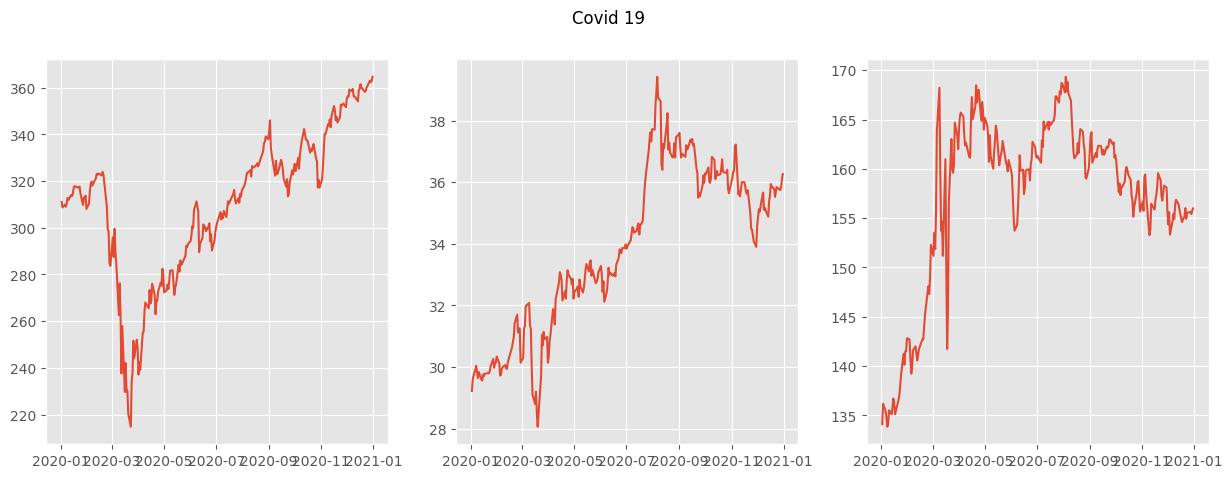

In [50]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)
fig.suptitle('Covid 19')
plt.show()

In [51]:
ticker = 'PDBC'
ini = date(2020,1,1)
fin = date.today()
df2 = get_stock(ticker, ini, fin)
df2.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-11-11,PDBC,13.41,13.430,13.3312,13.38,2736384.0
2024-11-08,PDBC,13.68,13.685,13.5500,13.60,1951448.0
2024-11-07,PDBC,13.69,13.825,13.6545,13.79,1919526.0
2024-11-06,PDBC,13.49,13.735,13.4900,13.66,2960991.0
2024-11-05,PDBC,13.81,13.850,13.7400,13.79,1543687.0


In [52]:
# 1er Método
df2[['Close','Volume']]

# 2do Método
df2.iloc[:, [4,5]]

# 3er Método
df2.drop(['Ticker','High','Low','Open'], axis=1, inplace=True)
df2.head()

,Close,Volume
Date,,
2024-11-11,13.38,2736384.0
2024-11-08,13.60,1951448.0
2024-11-07,13.79,1919526.0
2024-11-06,13.66,2960991.0
2024-11-05,13.79,1543687.0


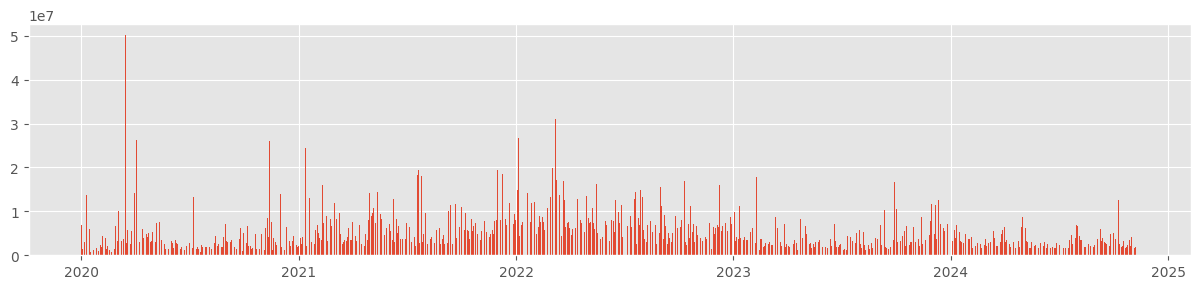

In [55]:
x = df2.index
y = df2['Volume']

plt.figure(figsize = (15,3))
plt.bar(x,y)
plt.show()

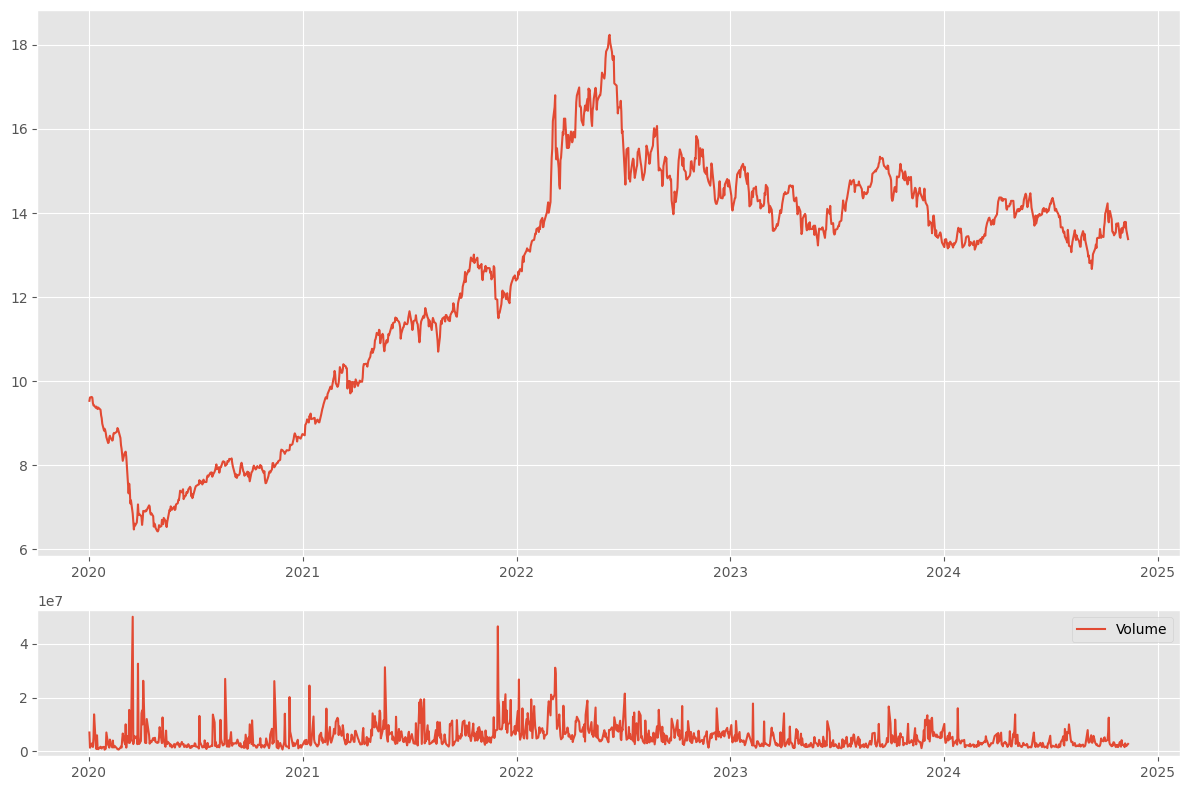

In [58]:
x = df2.index.values
y = df2['Close'].values
z = df2['Volume'].values

fig = plt.figure(figsize=(12, 8))

top_grid = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bot_grid = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

top_grid.plot(x, y, label='Close')
bot_grid.plot(x, z, label='Volume')

plt.tight_layout()
plt.legend()
plt.show()

In [62]:
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


In [61]:
stock['SPY'].shift(1).head()

Date
2020-01-02        NaN
2020-01-03    311.097
2020-01-06    308.737
2020-01-07    309.907
2020-01-08    309.044
Name: SPY, dtype: float64

In [63]:
# Porcentaje de variación del precio diario -> Cambio porcentual diario
# Método 1

spy_daily_pc = (stock['SPY'] / stock['SPY'].shift(1) - 1 ) * 100
spy_daily_pc.head()

Date
2020-01-02         NaN
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

<Axes: xlabel='Date'>

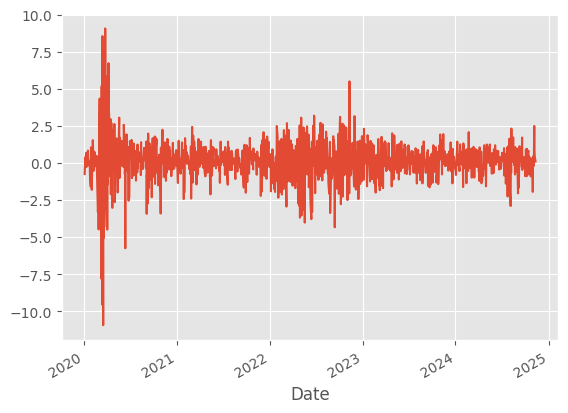

In [64]:
spy_daily_pc.plot()

In [65]:
spy_daily_pc = (stock['SPY'] - stock['SPY'].shift(1)) / stock['SPY'].shift(1) * 100
spy_daily_pc.head()

Date
2020-01-02         NaN
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

In [66]:
spy_daily_pc.iloc[0] = 0
spy_daily_pc.head()

Date
2020-01-02    0.000000
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

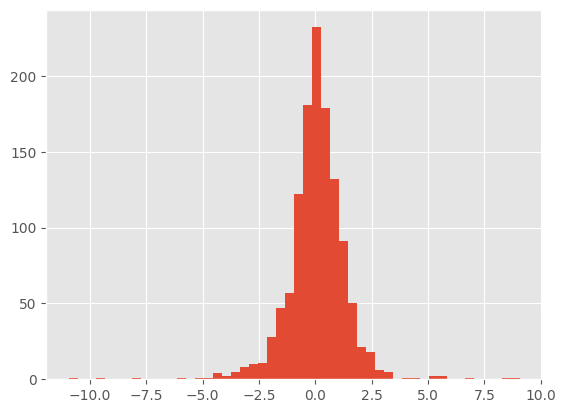

In [67]:
plt.hist(spy_daily_pc, bins=50)
plt.show()

In [68]:
stock_daily_pc = (stock - stock.shift(1)) / stock.shift(1) * 100
stock_daily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,0.378963,0.616381,0.368718,0.245248,-0.569775,0.128356,1.012829
2020-01-07,-0.278471,0.037741,-0.307312,0.244648,-0.492549,-0.183146,0.401070
2020-01-08,0.529698,0.999245,0.407389,-0.488103,-0.664930,-1.366902,-0.732357


In [88]:
# Cuanto aumento o decremento el valor porcentual a lo largo de los años?

stock_daily_cumsum = stock_daily_pc.cumsum()
stock_daily_cumsum.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,-0.379643,-0.384293,-0.534365,-0.906267,0.974330,0.960383,2.381755
2020-01-07,-0.658113,-0.346552,-0.841677,-0.661619,0.481781,0.777237,2.782824
2020-01-08,-0.128415,0.652693,-0.434288,-1.149721,-0.183150,-0.589665,2.050467


In [83]:
stock_daily_cumsum.tail()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2024-11-05,72.674479,116.913595,53.679484,48.239121,-29.050114,46.773498,63.012922
2024-11-06,75.161040,119.718854,54.991291,47.489318,-31.788953,45.830785,59.963318
2024-11-07,75.934254,121.808123,56.045408,49.715958,-30.536182,46.782469,61.615717
2024-11-08,76.367423,121.653084,55.766147,48.782469,-29.266062,45.404659,60.910664
2024-11-11,76.456024,121.199668,55.881459,48.429112,-29.752601,43.787012,58.563524


<Axes: xlabel='Date'>

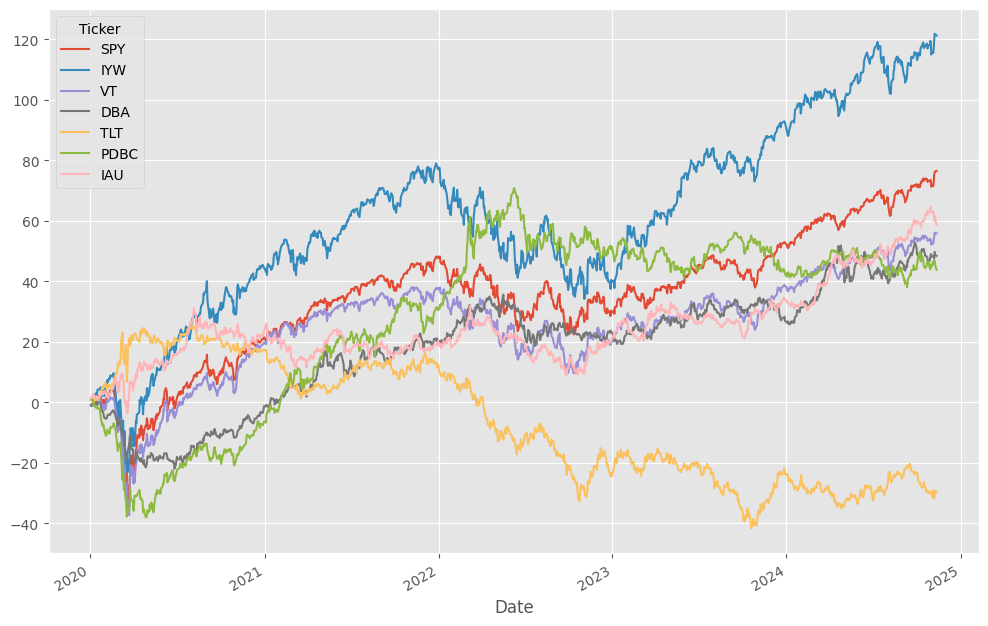

In [70]:
stock_daily_cumsum.plot(figsize=(12,8))

In [71]:
stock_corr = stock_daily_cumsum.corr()
stock_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.982060,0.981412,0.917292,-0.701625,0.766009,0.793850
IYW,0.982060,1.000000,0.960460,0.870303,-0.672537,0.679056,0.834973
VT,0.981412,0.960460,1.000000,0.856654,-0.595424,0.704550,0.746469
DBA,0.917292,0.870303,0.856654,1.000000,-0.844568,0.908600,0.704399
TLT,-0.701625,-0.672537,-0.595424,-0.844568,1.000000,-0.814250,-0.577710
PDBC,0.766009,0.679056,0.704550,0.908600,-0.814250,1.000000,0.437285
IAU,0.793850,0.834973,0.746469,0.704399,-0.577710,0.437285,1.000000


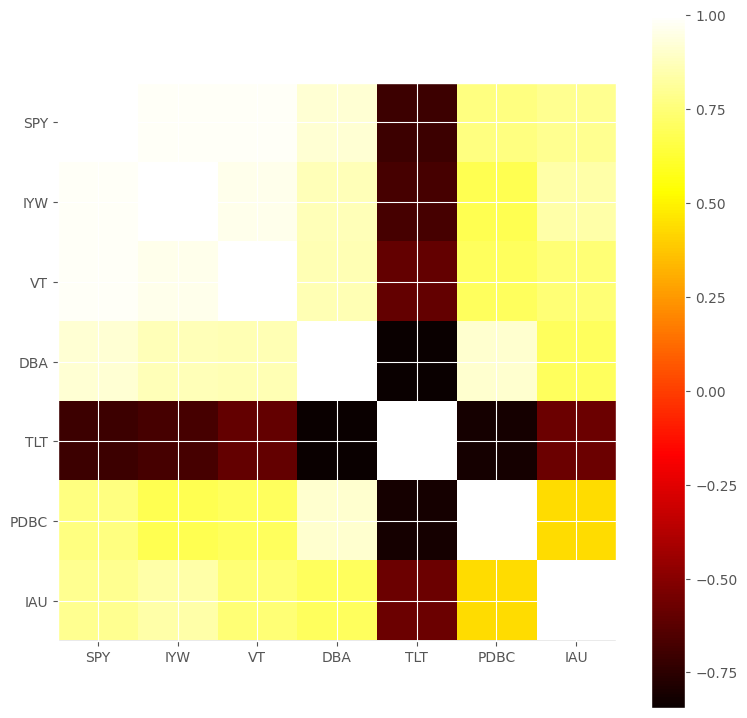

In [72]:
x = range(len(stock_corr))
y = stock_corr.columns

plt.imshow(stock_corr, cmap ='hot', interpolation ='none')
plt.colorbar()
plt.xticks(x, y)
plt.yticks(x, y)
plt.gcf().set_size_inches(9,9)

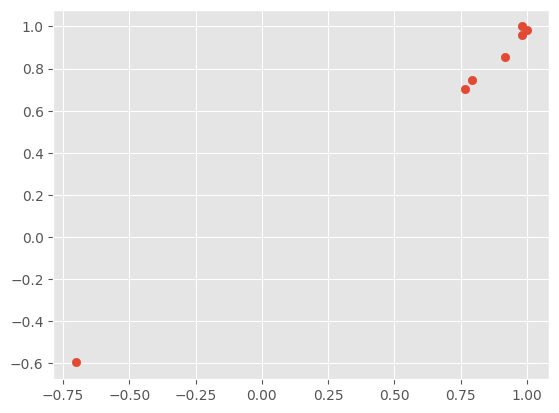

In [73]:
iyw = stock_corr.IYW
spy = stock_corr.SPY
vt  = stock_corr.VT

plt.scatter(spy, vt)
# Graficar dispersión spy vs iyw
# Graficar dispersión vt vs iyw

In [84]:
stock_daily_pc['SPY'].describe()

count    1223.000000
mean        0.062515
std         1.336311
min       -10.946618
25%        -0.525081
50%         0.091283
75%         0.754429
max         9.059667
Name: SPY, dtype: float64

In [86]:
# Variación del precio de las acciones durante un periodo determinado

periods = 75
vol = stock_daily_pc.rolling(window=periods).std()
vol.tail()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2024-11-05,0.951532,1.614259,0.920807,0.932173,0.852447,1.087222,0.828771
2024-11-06,0.991635,1.645344,0.931289,0.936854,0.909337,1.089457,0.908558
2024-11-07,0.955414,1.580360,0.908393,0.965151,0.912804,1.094417,0.923015
2024-11-08,0.952947,1.575799,0.908033,0.968495,0.919719,1.106178,0.907524
2024-11-11,0.946105,1.573529,0.899834,0.969530,0.916961,1.117367,0.947398


<Axes: xlabel='Date'>

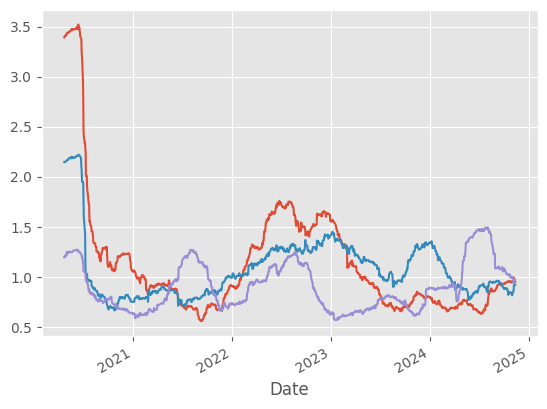

In [75]:
vol["SPY"].plot()
vol["TLT"].plot()
vol["DBA"].plot()